In [43]:
import numpy as np 
import pandas as pd

import os
for dirname, _, filenames in os.walk('./images'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./images\apple fruit\Image_1.jpg
./images\apple fruit\Image_10.jpg
./images\apple fruit\Image_11.jpg
./images\apple fruit\Image_12.jpg
./images\apple fruit\Image_13.png
./images\apple fruit\Image_14.png
./images\apple fruit\Image_15.jpg
./images\apple fruit\Image_16.jpg
./images\apple fruit\Image_17.jpeg
./images\apple fruit\Image_18.jpg
./images\apple fruit\Image_19.jpg
./images\apple fruit\Image_2.jpg
./images\apple fruit\Image_20.jpg
./images\apple fruit\Image_21.jpg
./images\apple fruit\Image_22.jpg
./images\apple fruit\Image_23.png
./images\apple fruit\Image_24.jpg
./images\apple fruit\Image_25.jpg
./images\apple fruit\Image_26.jpg
./images\apple fruit\Image_27.jpg
./images\apple fruit\Image_28.png
./images\apple fruit\Image_29.jpg
./images\apple fruit\Image_3.jpeg
./images\apple fruit\Image_30.jpg
./images\apple fruit\Image_31.png
./images\apple fruit\Image_32.jpg
./images\apple fruit\Image_33.jpg
./images\apple fruit\Image_34.jpeg
./images\apple fruit\Image_35.jpg
./images\apple

In [44]:
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [46]:

def load_img_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
#         img = cv2.imread(os.path.join(folder, filename))
        img = plt.imread(os.path.join(folder, filename))

        if img is not None:
            images.append(img)
        
    return images

apple_img = load_img_from_folder('images/apple fruit')
banana_img = load_img_from_folder('images/banana fruit')
cherry_img = load_img_from_folder('images/cherry fruit')
chickoo_img = load_img_from_folder('images/chickoo fruit')
grapes_img = load_img_from_folder('images/grapes fruit')
kiwi_img = load_img_from_folder('images/kiwi fruit')
mango_img = load_img_from_folder('images/mango fruit')
orange_img = load_img_from_folder('images/orange fruit')
# strawberry_img = load_img_from_folder('images/strawberry fruit')

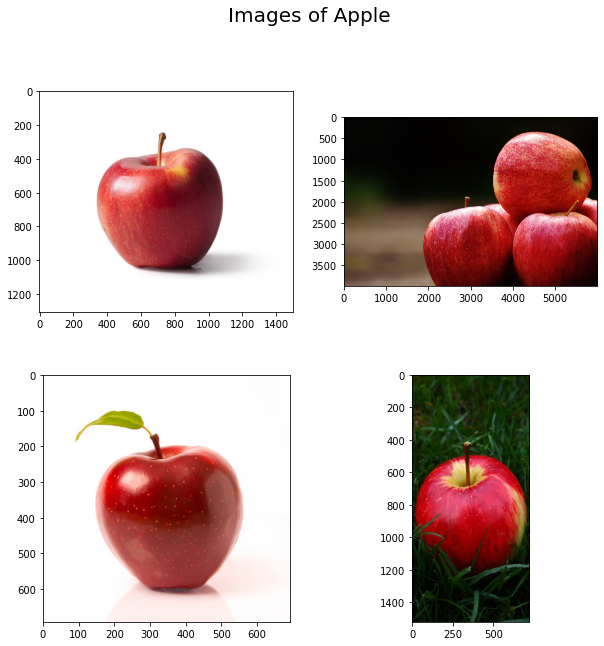

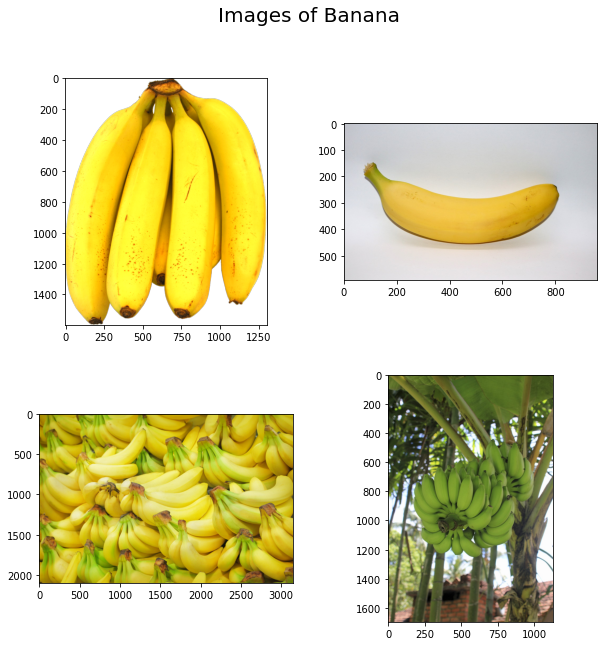

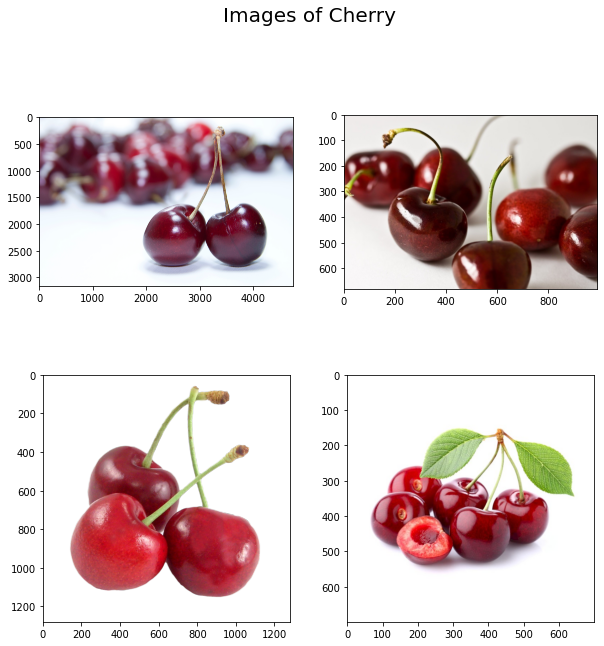

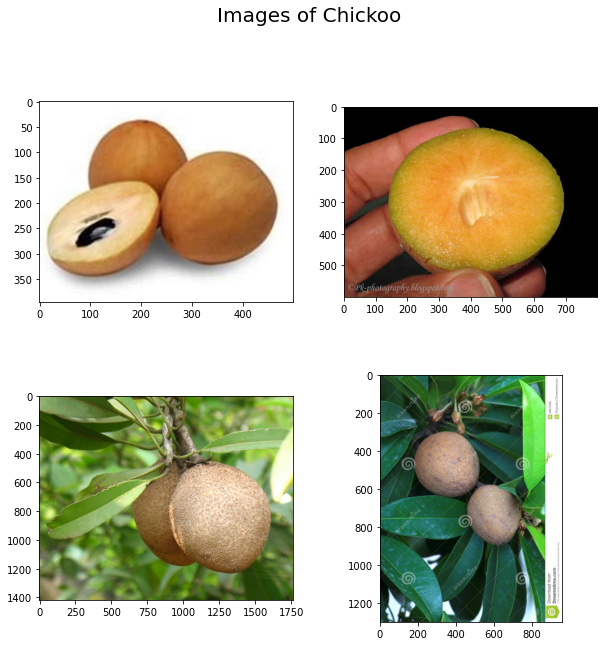

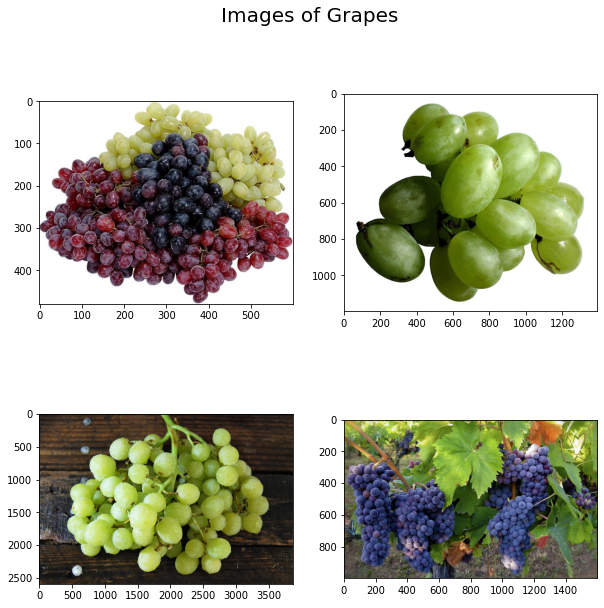

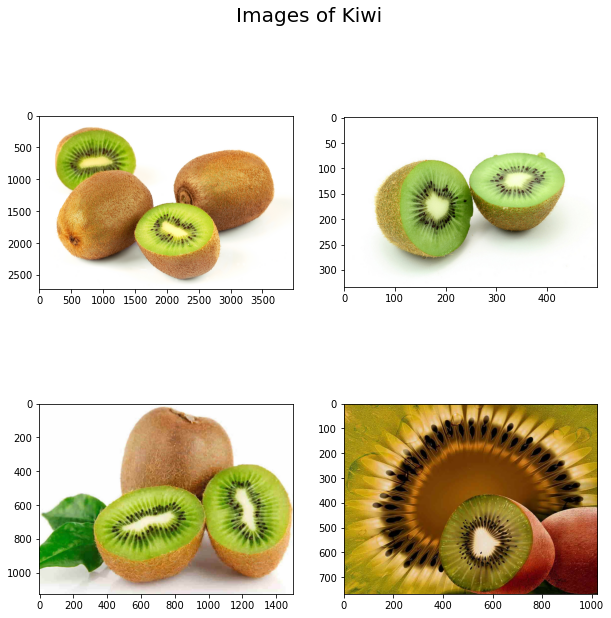

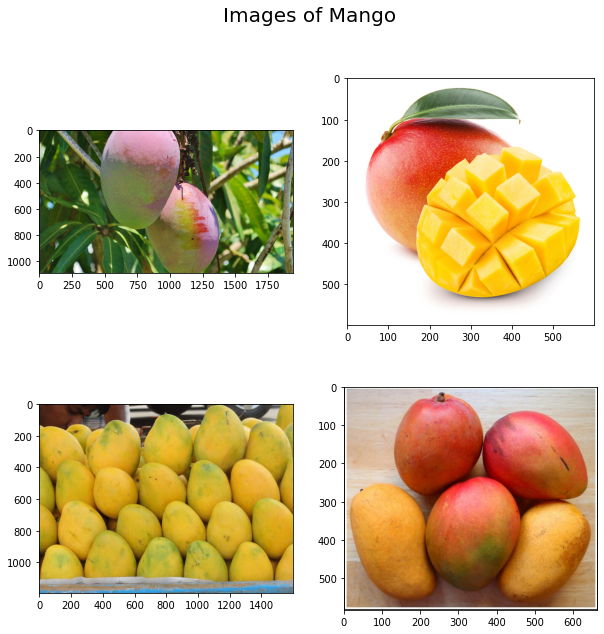

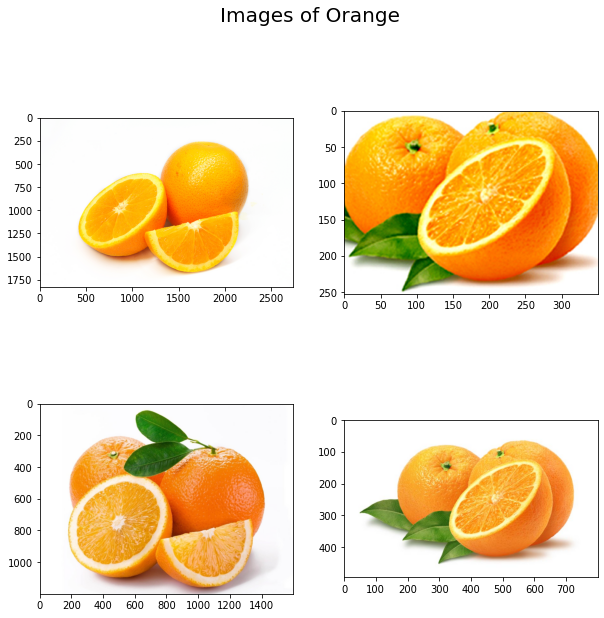

In [47]:
def plt_img(fruit_list, fruit_name):
    f, axarr = plt.subplots(2,2, figsize = (10,10))
    axarr[0,0].imshow(fruit_list[1])
    axarr[0,1].imshow(fruit_list[10])
    axarr[1,0].imshow(fruit_list[11])
    axarr[1,1].imshow(fruit_list[12])
    f.suptitle(f'Images of {fruit_name}', fontsize = 20)
    return plt.show()

plt_img(apple_img, 'Apple')
plt_img(banana_img, 'Banana')
plt_img(cherry_img, 'Cherry')
plt_img(chickoo_img, 'Chickoo')
plt_img(grapes_img, 'Grapes')
plt_img(kiwi_img, 'Kiwi')
plt_img(mango_img, 'Mango')
plt_img(orange_img, 'Orange')
# plt_img(strawberry_img)

In [48]:
all_images = apple_img + banana_img + cherry_img + chickoo_img + grapes_img + kiwi_img + mango_img + orange_img


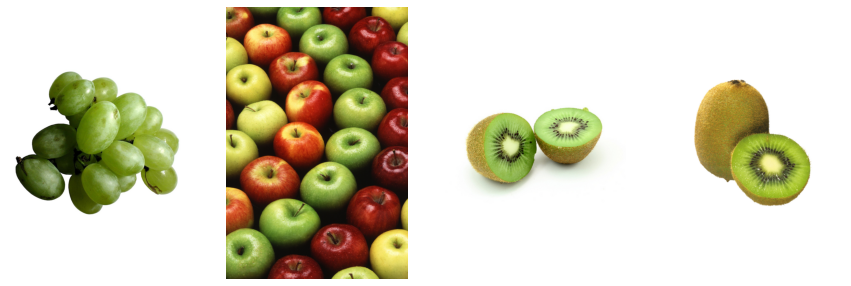

In [49]:
import random

selected_images = random.sample(all_images, 4)

# Display the selected images using Matplotlib
fig, axes = plt.subplots(1, 4, figsize=(15, 5))  # Adjust the figsize as needed

for i, image in enumerate(selected_images):
    axes[i].imshow(image)
    axes[i].axis('off')

plt.show()

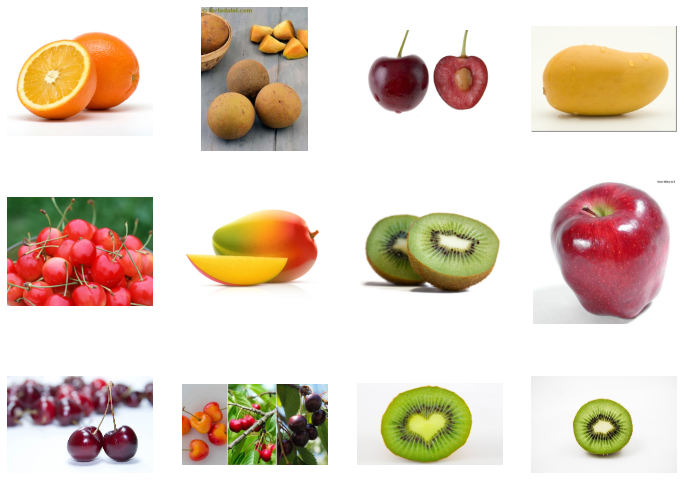

In [50]:
random_images = random.sample(all_images, 12)

# Plot the selected images
fig, axes = plt.subplots(3, 4, figsize=(12, 9))  # Adjust figsize as needed

for i, ax in enumerate(axes.flat):
    # Check if there are still images to display
    if i < len(random_images):
        ax.imshow(random_images[i])
        ax.axis('off')
    else:
        # If all 12 images are displayed, remove extra subplots
        fig.delaxes(ax)

plt.show()

In [54]:
data_dir = "./images"

# List to store loaded images
images = []
# List to store corresponding labels
labels = []

# Loop through each folder (fruit type) in the dataset directory
for folder_name in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder_name)
    # Loop through each image in the folder
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        # Read the image using OpenCV
        img = cv2.imread(img_path)
        # Check if the image is valid (not None)
        if img is not None:
            
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Resize the image to a fixed size
            img = cv2.resize(img, (224, 224))
            
            # Append the image to the list
            images.append(img)
            # Append the label (fruit type) to the labels list
            labels.append(folder_name)
        else:
            print(f"Invalid image file: {img_path}")


# Convert lists to numpy arrays for further processing
images = np.array(images)
labels = np.array(labels)

Invalid image file: ./images\mango fruit\Image_13.jpg


In [55]:
normalized_images = images / 255.0

In [56]:
from sklearn.preprocessing import LabelBinarizer

# Instantiate the LabelBinarizer
label_binarizer = LabelBinarizer()

# Fit and transform the training labels
labels_encoded = label_binarizer.fit_transform(labels)

# Print the classes
print("Classes:", label_binarizer.classes_)

Classes: ['apple fruit' 'banana fruit' 'cherry fruit' 'chickoo fruit'
 'grapes fruit' 'kiwi fruit' 'mango fruit' 'orange fruit'
 'strawberry fruit']


In [57]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(normalized_images, labels_encoded, test_size=0.2, random_state=42)

# Print the shapes of the training and validation sets
print("Training set shape:", x_train.shape)
print("Validation set shape:", x_val.shape)

Training set shape: (287, 224, 224, 3)
Validation set shape: (72, 224, 224, 3)


In [58]:
k = len(set(labels))
print(k)

9


In [59]:
i = Input(shape = x_train[0].shape)
#32
x = Conv2D(32, (3,3), strides = 2, activation = 'relu')(i)
x = Conv2D(32, (3,3), strides = 2, activation = 'relu')(x)
x = MaxPooling2D((2,2))(x)
#64
x = Conv2D(64, (3,3), strides = 2, activation = 'relu')(i)
x = Conv2D(64, (3,3), strides = 2, activation = 'relu')(x)
x = MaxPooling2D((2,2))(x)
#128
x = Conv2D(128, (3,3), strides = 2, activation = 'relu')(i)
x = Conv2D(128, (3,3), strides = 2, activation = 'relu')(x)
x = MaxPooling2D((2,2))(x)

# x = Conv2D(128, (3,3), strides = 2, activation = 'relu')(x)
x = Conv2D(256, (3,3), strides = 2, activation = 'relu')(x)
x = MaxPooling2D((2,2))(x)


x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(k, activation = 'softmax')(x)

model = Model(i, x)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_4 (Conv2D)           (None, 111, 111, 128)     3584      
                                                                 
 conv2d_5 (Conv2D)           (None, 55, 55, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 27, 27, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 13, 13, 256)       295168    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 256)        0         
 2D)                                                         

In [60]:
r = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 30)

# Evaluate the model on the testing set
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/30
9/9 [==============================] - 13s 1s/step - loss: 2.2429 - accuracy: 0.0976 - val_loss: 2.0384 - val_accuracy: 0.2917
Epoch 2/30
9/9 [==============================] - 11s 1s/step - loss: 1.8500 - accuracy: 0.2648 - val_loss: 1.4668 - val_accuracy: 0.4306
Epoch 3/30
9/9 [==============================] - 12s 1s/step - loss: 1.4475 - accuracy: 0.4355 - val_loss: 1.5423 - val_accuracy: 0.4306
Epoch 4/30
9/9 [==============================] - 10s 1s/step - loss: 1.3121 - accuracy: 0.4878 - val_loss: 1.5358 - val_accuracy: 0.4167
Epoch 5/30
9/9 [==============================] - 10s 1s/step - loss: 1.1610 - accuracy: 0.5610 - val_loss: 1.2883 - val_accuracy: 0.5556
Epoch 6/30
9/9 [==============================] - 9s 966ms/step - loss: 1.0339 - accuracy: 0.5889 - val_loss: 1.4124 - val_accuracy: 0.5417
Epoch 7/30
9/9 [==============================] - 8s 948ms/step - loss: 1.0358 - accuracy: 0.5889 - val_loss: 1.4810 - val_accuracy: 0.4167
Epoch 8/30
9/9 [==============

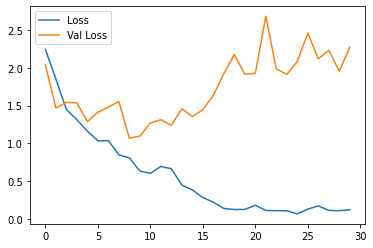

In [61]:
plt.plot(r.history['loss'], label = 'Loss')
plt.plot(r.history['val_loss'], label = 'Val Loss')
plt.legend()
plt.show()

3/3 [==============================] - 1s 138ms/step


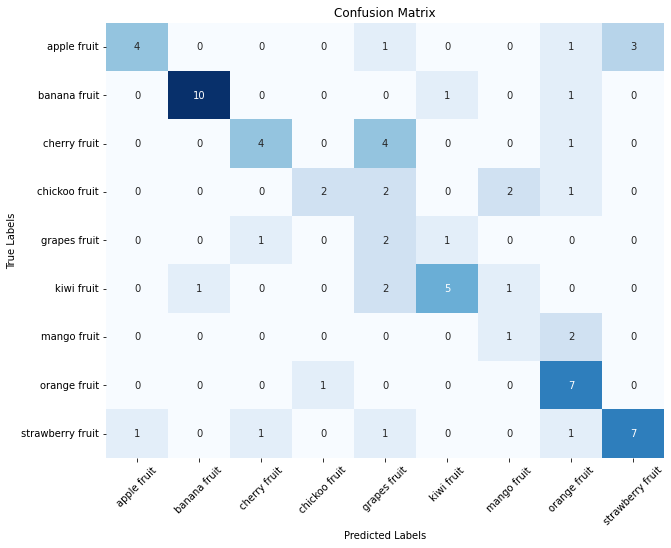

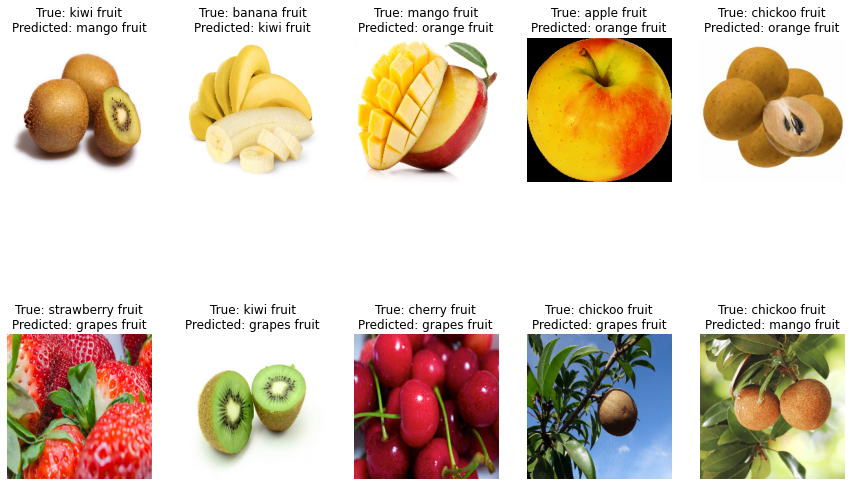

In [64]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get the predicted labels for the testing set
y_pred = model.predict(x_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=label_binarizer.classes_, yticklabels=label_binarizer.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

misclassified_indices = np.where(y_pred_classes != y_true_classes)[0]

# Display misclassified images
plt.figure(figsize=(15, 10))
for i, index in enumerate(misclassified_indices[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_val[index])
    plt.title(f"True: {label_binarizer.classes_[y_true_classes[index]]}\nPredicted: {label_binarizer.classes_[y_pred_classes[index]]}")
    plt.axis('off')
plt.show()